# Question 1: Python Fundementals

In [165]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
df1 = pd.read_csv("/users/chris/pythonML/authorInfo.csv")
df2 = pd.read_csv("/users/chris/pythonML/articleInfo.csv")

In [166]:
merged_df = pd.merge(df1, df2, on="Article No.") # merge two datasets into one frame based on "Article no."
merged_df.fillna(0, inplace=True) # fill any missing values with 0

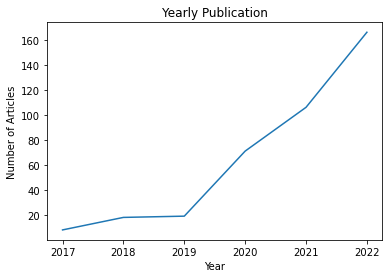

In [167]:
yearly_publication = merged_df.groupby(merged_df["Year"]).size() # get the number of articles published during each year
plt.plot(yearly_publication.index, yearly_publication.values) 
plt.xlabel("Year")
plt.ylabel("Number of Articles")
plt.title("Yearly Publication")
plt.show()

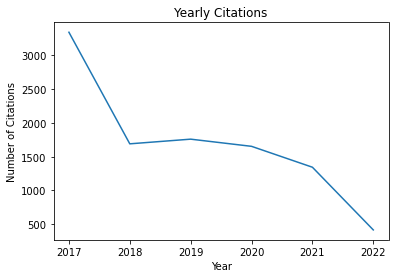

In [168]:
yearly_citation = merged_df.groupby("Year")["Citation"].sum() # group dataset by year and then get the total citations for each year
plt.plot(yearly_citation.index, yearly_citation.values)
plt.xlabel("Year")
plt.ylabel("Number of Citations")
plt.title("Yearly Citations")
plt.show()

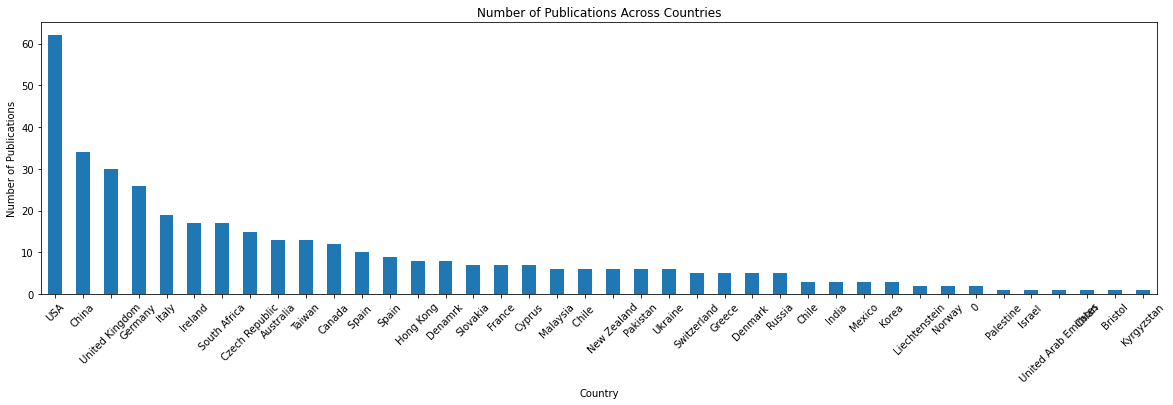

In [169]:
publications_by_country = merged_df['Country'].value_counts() # get the country column and the number of publications for each
publications_by_country.plot(kind='bar',figsize=(20, 5)) # plot a bar chart and adjust size so x axis titles can fit
plt.xlabel("Country")
plt.ylabel("Number of Publications")
plt.title("Number of Publications Across Countries")
plt.xticks(rotation=45)
plt.show()

In [170]:
# modify dataset so that it contains only articles with desired key words
new_df = merged_df.loc[(merged_df['Key Words'].str.contains('virtual reality')) | (merged_df['Key Words'].str.contains('augmented reality'))]
# get the number of articles published for each institutions
institution_count = new_df['Author Affiliation'].value_counts()
top_institutions = institution_count[:5] # get the first 5 institutions
print(top_institutions) # top 5 institutions that have the most published articles in VR/AR

University of the Western Cape    17
Masaryk University                12
Intel Corporation                 11
University College Cork           11
Madigan Army Medical Center        8
Name: Author Affiliation, dtype: int64


In [171]:
new_df = new_df.sort_values(by='h-index', ascending=False)
top_authors = new_df.head(5)
print(top_authors['Author Name'].tolist()) # top 5 researchers that have the most h-index in the VR/AR area

['Ulrich Trautwein', 'Maria Luisa Lorusso', 'Pierre-Majorique Léger ', 'Francisco-Javier Hinojo-Lucena', 'Marc Erich Latoschik']


# Question 2: Regression

In [198]:
df = pd.read_csv("/users/chris/pythonML/data.csv")
df.dropna(axis=1, thresh=1, inplace=True) # removes empty column
df = df.fillna(0) # fill any missing values with 0
df.head(10)

,Purchase,SUS,Duration,Gender,ASR_Error,Intent_Error
0,1,84,254,0,3,2
1,0,58,247,0,6,9
2,0,56,125,1,6,8
3,0,55,22,0,11,7
4,1,95,262,0,2,3
5,0,71,113,1,8,9
6,0,76,91,1,6,3
7,0,64,46,0,6,11
8,0,56,132,0,9,9
9,0,96,190,0,11,4


In [199]:
df.corr(method='pearson')['SUS'].sort_values() # get pearson r values

Intent_Error   -0.693675
ASR_Error      -0.662405
Duration       -0.006631
Gender          0.111523
Purchase        0.661931
SUS             1.000000
Name: SUS, dtype: float64

In [200]:
import statsmodels.api as sm
y = df['SUS'] # dependent variable
x = df.drop(columns='SUS') # predictor variables

In [201]:
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary());

                            OLS Regression Results                            
Dep. Variable:                    SUS   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     27.39
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           5.25e-17
Time:                        17:51:29   Log-Likelihood:                -362.39
No. Observations:                 100   AIC:                             736.8
Df Residuals:                      94   BIC:                             752.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           93.0282      5.541     16.788   

In [202]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = df.drop(columns='SUS') # drop the sus column and assign the independent variables to the x variable
y = df['SUS'] # assign the SUS column (dependent variable) to the y variable

x_train, x_test, y_train, y_test = train_test_split(x, y)

lr = LinearRegression().fit(x_train,y_train) # create a linear regression model with the training data variables

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print("The R square score of linear regression model is: ", lr.score(x_test,y_test)) # print the r^2 score of the linear regression model

The R square score of linear regression model is:  0.2297580508857502


## Question 2: Evaluation
- Purchase, duration, and gender were statistically insignificant (> 0.05 p value)
    - I did not expect "purchase" to be insignificant b/c I thought if a customer was able to purchase a ticket using siri, they would give siri a higher SUS score.
    - I expected "duration" to be insignificant b/c a customer could spend a lot of time using siri if they like using siri, or if they are having a lot of trouble with it.
    - I expected "gender" to be insignificant b/c I did not think gender would be relevant to this model
- ASR_Error and Intent_Error were statistically significant (< 0.05 p value)
    - I expected both ASR_Error and Intent_Error to be significant b/c it makes sense that the number of times siri failes to recognize a certain thing would affect siri's SUS score.
- The model suggests that Intent_Error is the most influential factor on SUS
    - this is evident b/c it has the lowest p value from the model (0.00) and also the highest pearson |r| value, though negatively correlated.
- Potential reasons for Intent_Error and ASR_Error being significant predicators of SUS:
    - if siri fails for the customer, the customer is less likely to be happy with their experience, and more likely to give siri a bad SUS score
    - this is evident in the high negative pearson r score for these two factors, showing their negative correlation with SUS

# Question 3: Classification

In [203]:
df.drop(columns=["SUS"], inplace=True) # remove the "SUS" column from dataframe so it is not included as an independent variable
df.head(10)

,Purchase,Duration,Gender,ASR_Error,Intent_Error
0,1,254,0,3,2
1,0,247,0,6,9
2,0,125,1,6,8
3,0,22,0,11,7
4,1,262,0,2,3
5,0,113,1,8,9
6,0,91,1,6,3
7,0,46,0,6,11
8,0,132,0,9,9
9,0,190,0,11,4


In [204]:
# convert to numpy so that it recognizes data
y = df['Purchase'].to_numpy() # set dependent variable to y 
X = df.drop('Purchase', axis = 1).to_numpy() # set independent variables to X

In [205]:
# scale our data into a normal distribution
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

scale = StandardScaler()
scaled_X = scale.fit_transform(X) # give scaler function input of our data set

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3) # split dataset into testing and training

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

import matplotlib.pyplot as plt

In [207]:
# initialize ML models
lc = LogisticRegression() # logistic regression
svc = SVC(probability=True) # SVM
nbc = GaussianNB() # Naive Bayes
rfc = RandomForestClassifier() # Random forest

In [208]:
# train ML models
lc.fit(X_train, y_train)
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [209]:
# testing models with training dataset
y_lc_predicted = lc.predict(X_test) # predicted results of our training model
y_lc_pred_proba = lc.predict_proba(X_test) # generating ROC curve

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.94      0.97        17

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.94      0.97        17

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

              preci

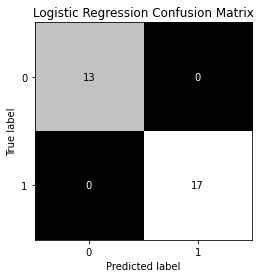

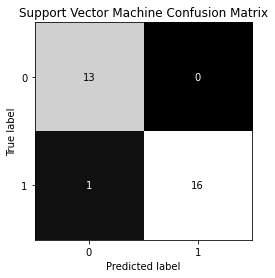

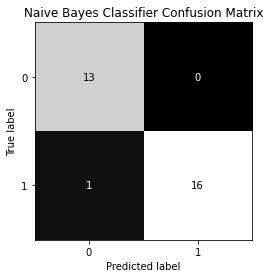

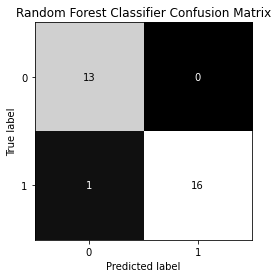

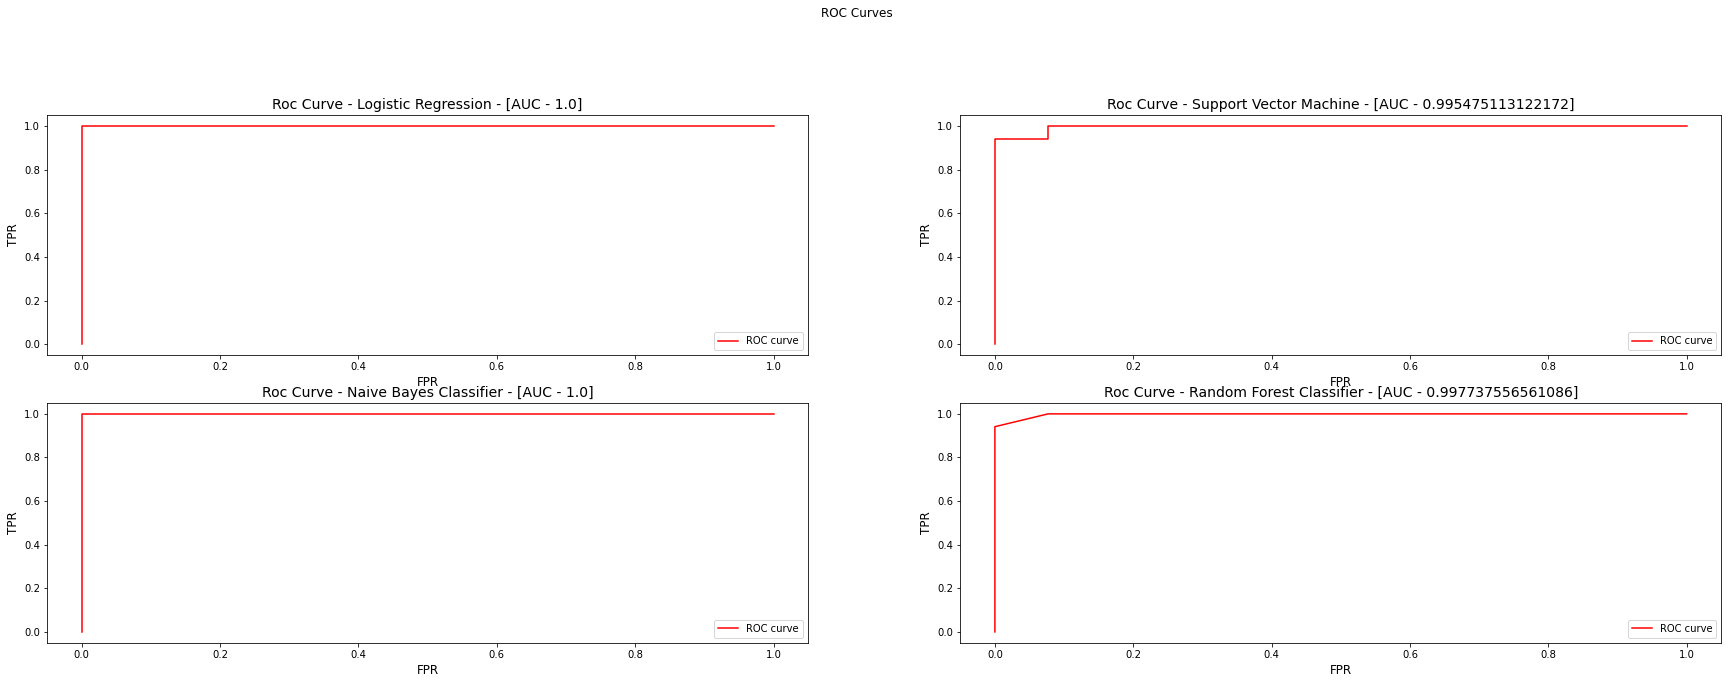

In [210]:
# print classification metrics
print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1
# create confusion matrixes for each model
for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

# create ROC curves for each model
for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()